<a href="https://colab.research.google.com/github/runtorain/PythonForAI/blob/main/TimeSeriesForecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using c

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt

# Use the stock symbol with the '.BK' suffix for the Thai market
stock = yf.Ticker("AIMIRT.BK")

# Get historical market data
hist = stock.history(period="max")

In [2]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-10 00:00:00+07:00,5.962563,6.022189,5.932750,5.962563,6582234,0.0,0.0
2018-01-11 00:00:00+07:00,5.962563,5.962563,5.932751,5.932751,2823546,0.0,0.0
2018-01-12 00:00:00+07:00,5.962563,5.962563,5.932751,5.932751,493582,0.0,0.0
2018-01-15 00:00:00+07:00,5.962563,5.962563,5.932750,5.962563,705193,0.0,0.0
2018-01-16 00:00:00+07:00,5.962563,5.962563,5.932750,5.962563,397530,0.0,0.0
...,...,...,...,...,...,...,...
2024-08-16 00:00:00+07:00,10.900000,10.900000,10.800000,10.800000,145000,0.0,0.0
2024-08-19 00:00:00+07:00,10.800000,10.800000,10.800000,10.800000,0,0.0,0.0
2024-08-20 00:00:00+07:00,10.800000,10.800000,10.600000,10.700000,446300,0.0,0.0


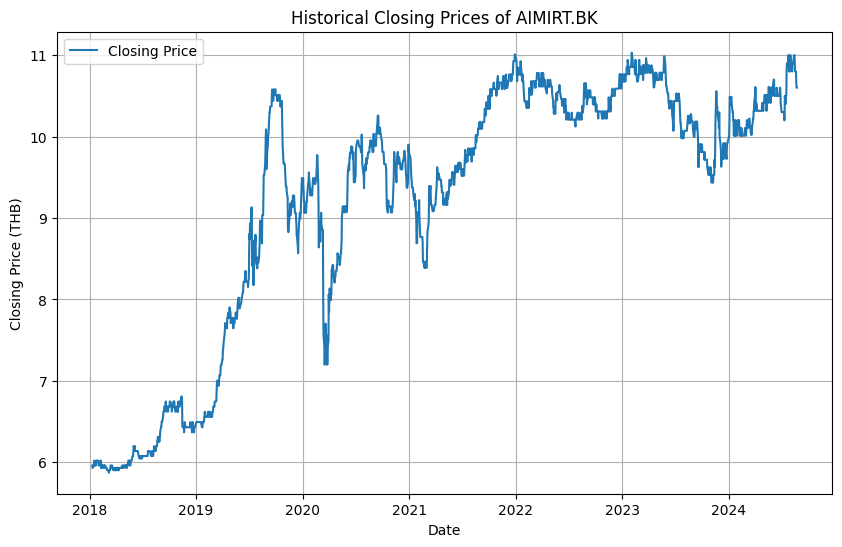

In [3]:
# Plot the closing price over time
plt.figure(figsize=(10, 6))
plt.plot(hist.index, hist['Close'], label="Closing Price")
plt.title("Historical Closing Prices of AIMIRT.BK")
plt.xlabel("Date")
plt.ylabel("Closing Price (THB)")
plt.legend()
plt.grid(True)
plt.show()

In [5]:
import pandas as pd

# Prepare data for AutoGluon
data = hist[['Close']].reset_index()
data.columns = ['timestamp', 'target']
data['item_id'] = 'AIMIRT'
data['timestamp'] = pd.to_datetime(data['timestamp']).dt.tz_localize(None)

In [6]:
data

,timestamp,target,item_id
0,2018-01-10,5.962563,AIMIRT
1,2018-01-11,5.932751,AIMIRT
2,2018-01-12,5.932751,AIMIRT
3,2018-01-15,5.962563,AIMIRT
4,2018-01-16,5.962563,AIMIRT
...,...,...,...
1602,2024-08-16,10.800000,AIMIRT
1603,2024-08-19,10.800000,AIMIRT
1604,2024-08-20,10.700000,AIMIRT
1605,2024-08-21,10.600000,AIMIRT


In [7]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Filter the DataFrame for rows where the 'timestamp' is after 2022
data_filtered = data[data['timestamp'] > '2022-01-01']

# Display the filtered DataFrame
print(data_filtered)

      timestamp     target item_id
968  2022-01-04  10.926476  AIMIRT
969  2022-01-05  10.762169  AIMIRT
970  2022-01-06  10.680016  AIMIRT
971  2022-01-07  10.844323  AIMIRT
972  2022-01-10  10.844323  AIMIRT
...         ...        ...     ...
1602 2024-08-16  10.800000  AIMIRT
1603 2024-08-19  10.800000  AIMIRT
1604 2024-08-20  10.700000  AIMIRT
1605 2024-08-21  10.600000  AIMIRT
1606 2024-08-22  10.600000  AIMIRT

[639 rows x 3 columns]


In [9]:
import pandas as pd
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

# Prepare train_data (already done, just for reference)
train_data = TimeSeriesDataFrame.from_data_frame(
    data_filtered,
    id_column="item_id",
    timestamp_column="timestamp"
)

# Initialize predictor with frequency and other parameters
predictor = TimeSeriesPredictor(
    prediction_length=20,
    path="autogluon-m4-hourly",
    target="target",
    eval_metric="MASE",
    freq='D'  # Set frequency
)

# Fit the predictor
predictor.fit(
    train_data,
    presets="medium_quality",
    time_limit=600
)



Beginning AutoGluon training... Time limit = 600s
AutoGluon will save models to 'autogluon-m4-hourly'
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.69 GB / 12.67 GB (84.4%)
Disk Space Avail:   72.03 GB / 107.72 GB (66.9%)
Setting presets to: medium_quality

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': MASE,
 'freq': 'D',
 'hyperparameters': 'light',
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 20,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': False,
 'target': 'target',
 'time_limit': 600,
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 

In [10]:
predictions = predictor.predict(train_data)
predictions.head()

data with frequency 'None' has been resampled to frequency 'D'.
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


mean        0.1        0.2        0.3        0.4  \
item_id timestamp                                                           
AIMIRT  2024-08-23  10.614583  10.476906  10.523863  10.550698  10.587379   
        2024-08-24  10.619146  10.439809  10.502129  10.541284  10.586232   
        2024-08-25  10.643658  10.425035  10.499314  10.548013  10.602303   
        2024-08-26  10.651632  10.418652  10.495078  10.556627  10.608592   
        2024-08-27  10.659175  10.399103  10.481457  10.548758  10.610057   

                          0.5        0.6        0.7        0.8        0.9  
item_id timestamp                                                          
AIMIRT  2024-08-23  10.614583  10.640635  10.670637  10.705401  10.752131  
        2024-08-24  10.619146  10.650437  10.691238  10.740091  10.800704  
        2024-08-25  10.643658  10.683157  10.728880  10.789932  10.862166  
        2024-08-26  10.651632  10.697836  10.752553  10.818309  10.892121  
        2024-08-27  10.659175  10.709308  10.766317  10.839219  10.932432

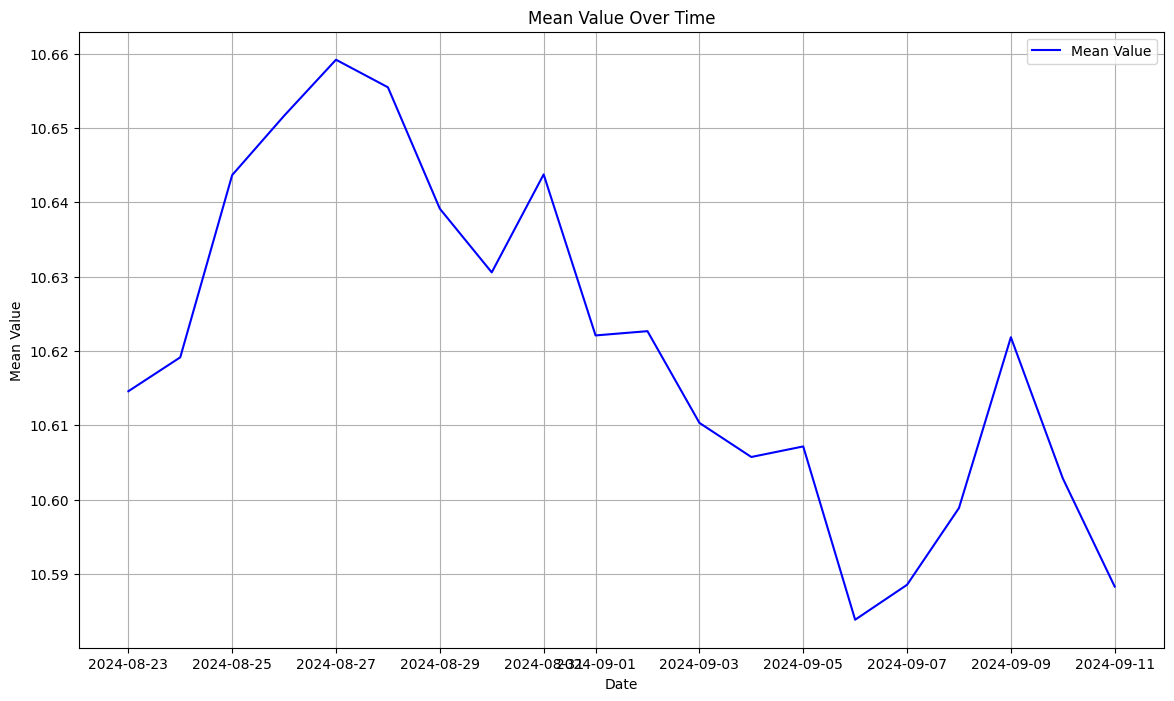

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from autogluon.timeseries.dataset import TimeSeriesDataFrame

# Convert TimeSeriesDataFrame to Pandas DataFrame
pandas_df = predictions.reset_index()

# Extract the 'mean' column
mean_df = pandas_df[['timestamp', 'mean']]

# Plot the 'mean' column
plt.figure(figsize=(14, 8))
plt.plot(mean_df['timestamp'], mean_df['mean'], label='Mean Value', color='blue')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Mean Value')
plt.title('Mean Value Over Time')
plt.legend()
plt.grid(True)

# Show plot
plt.show()
